In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.pyplot import figure
import time
import json
import plotly.express as px
import plotly.graph_objects as go

In [6]:
#use get get location to make path universal
path = os.getcwd() + '\\TSS_LRD\s9\LRDP1Z1'
path

'c:\\Users\\Tony Ho\\Documents\\Beacon-plot\\TSS_LRD\\s9\\LRDP1Z1'

In [5]:
# list for file name
base_path = r'C:\Users\Tony Ho\Downloads\Office test log\4m\ios'
os.listdir(base_path)

['4m_-12_ios.csv', '4m_-4_ios.csv', '4m_-8_ios.csv', '4m_0_ios.csv']

#Train Ride 
1. put 3 times train ride result together
2. intersection point if possible

#Yellow line
1. Plot with threshold
2. plot with train ride (how? overlay / side by side?)

In [34]:
def plot_by_df_uid(df,beacon1,beacon2,beacon3):
    #To ignore the useless row
    df = df[~df.UUID.str.contains("Rule")]
    df = df[~df.UUID.str.contains("=")]
    #Extract column from df
    df = df[['UID','RECEIVED TIME','RSSI']]
    df['RECEIVED TIME'] = pd.to_datetime(df['RECEIVED TIME'])
    #count the duration of data-taking
    diff = (df['RECEIVED TIME'].iloc[-1]-df['RECEIVED TIME'].iloc[0]).total_seconds()
    #create the time series as no missing RSSI
    dti = pd.date_range(df['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
    dti = dti.to_frame(name='time')
    dti['time_delta'] = ((dti['time']-dti['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

    df_merge1 = dti.merge(df[df.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
    df_merge1['RSSI'].fillna(-100, inplace=True)
    df_merge1['UID']=beacon1[0]
    df_merge2 = dti.merge(df[df.UID.isin(beacon2)], how='outer', left_on='time',right_on='RECEIVED TIME')
    df_merge2['RSSI'].fillna(-100, inplace=True)
    df_merge2['UID']=beacon2[0]
    df_merge3 = dti.merge(df[df.UID.isin(beacon3)], how='outer', left_on='time',right_on='RECEIVED TIME')
    df_merge3['RSSI'].fillna(-100, inplace=True)
    df_merge3['UID']=beacon3[0]
    return [df_merge1,df_merge2,df_merge3]

In [35]:
path1 = os.getcwd()+'\\'+'LRD_train_ride\p1\P1_tr_1_11pro.csv'
path2 = os.getcwd()+'\\'+'LRD_train_ride\p1\P1_tr_2_11pro.csv'
path3 = os.getcwd()+'\\'+'LRD_train_ride\p1\P1_tr_3_11pro.csv'

In [36]:
beacon1,beacon2,beacon3 = [146,147],[148,149],[150,151]
df = pd.read_csv(path1,skiprows=4)
train_ride1 = plot_by_df_uid(df,beacon1,beacon2,beacon3)
df = pd.read_csv(path2,skiprows=4)
train_ride2 = plot_by_df_uid(df,beacon1,beacon2,beacon3)
df = pd.read_csv(path3,skiprows=4)
train_ride3 = plot_by_df_uid(df,beacon1,beacon2,beacon3)
train_ride1

[                   time  time_delta  UID       RECEIVED TIME   RSSI
 0   2021-09-30 11:14:33           0  146                 NaT -100.0
 1   2021-09-30 11:14:34           1  146                 NaT -100.0
 2   2021-09-30 11:14:35           2  146                 NaT -100.0
 3   2021-09-30 11:14:36           3  146 2021-09-30 11:14:36  -95.0
 4   2021-09-30 11:14:37           4  146 2021-09-30 11:14:37  -89.0
 ..                  ...         ...  ...                 ...    ...
 229 2021-09-30 11:17:55         202  146                 NaT -100.0
 230 2021-09-30 11:17:56         203  146                 NaT -100.0
 231 2021-09-30 11:17:57         204  146                 NaT -100.0
 232 2021-09-30 11:17:58         205  146                 NaT -100.0
 233 2021-09-30 11:17:59         206  146                 NaT -100.0
 
 [234 rows x 5 columns],
                    time  time_delta  UID RECEIVED TIME   RSSI
 0   2021-09-30 11:14:33           0  148           NaT -100.0
 1   2021-09-30 11:

In [79]:
time_shift = 60

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=train_ride1[0]["time_delta"], y=train_ride1[0]["RSSI"], name=beacon1[0],
                         mode='lines+markers',line=dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x=train_ride1[1]["time_delta"], y=train_ride1[1]["RSSI"], name=beacon2[0],
                         mode='lines+markers',line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=train_ride1[2]["time_delta"], y=train_ride1[2]["RSSI"], name=beacon3[0],
                         mode='lines+markers',line=dict(color='green', width=1)))

fig.add_trace(go.Scatter(x=train_ride2[0]["time_delta"]+time_shift, y=train_ride2[0]["RSSI"], name=beacon1[0],
                         mode='markers',line=dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x=train_ride2[1]["time_delta"]+time_shift, y=train_ride2[1]["RSSI"], name=beacon2[0],
                         mode='markers',line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=train_ride2[2]["time_delta"]+time_shift, y=train_ride2[2]["RSSI"], name=beacon3[0],
                         mode='markers',line=dict(color='green', width=1)))

fig.add_trace(go.Scatter(x=train_ride3[0]["time_delta"]+2*time_shift, y=train_ride3[0]["RSSI"], name=str(beacon1[0])+'-3',
                         line=dict(color='firebrick', width=2)))
fig.add_trace(go.Scatter(x=train_ride3[1]["time_delta"]+2*time_shift, y=train_ride3[1]["RSSI"], name=str(beacon2[0])+'-3',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=train_ride3[2]["time_delta"]+2*time_shift, y=train_ride3[2]["RSSI"], name=str(beacon3[0])+'-3',
                         line=dict(color='green', width=2)))

fig.add_hline(y=-64,line_width=3,line_color="firebrick")


fig.update_layout(xaxis_range=[0,200],title='Train ride plot of {},{},{}'.format(beacon1,beacon2,beacon3))

fig.show()
fig.write_html("Train ride plot.html")

(0.0, 180.0)

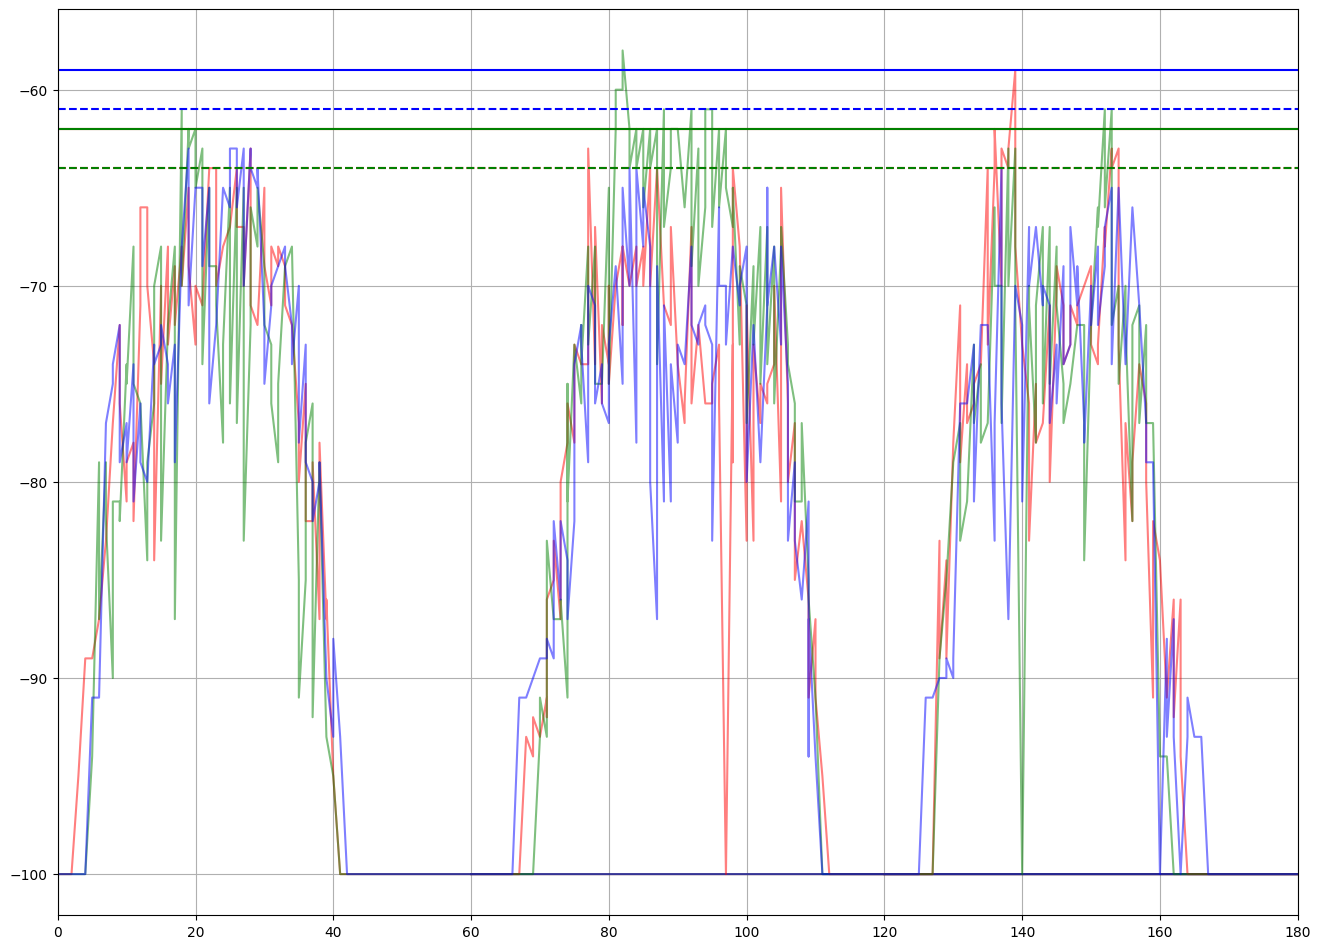

In [56]:
figure(figsize=(16, 12), dpi=100)
#first train ride data plot
plt.plot(train_ride1[0]['time_delta'],train_ride1[0]['RSSI'],'r',label=beacon1,alpha=0.5)
plt.plot(train_ride1[1]['time_delta'],train_ride1[1]['RSSI'],'g',label=beacon2,alpha=0.5)
plt.plot(train_ride1[2]['time_delta'],train_ride1[2]['RSSI'],'b',label=beacon3,alpha=0.5)

#second train ride data plot
plt.plot(train_ride2[0]['time_delta']+60,train_ride2[0]['RSSI'],'r',label=beacon1,alpha=0.5)
plt.plot(train_ride2[1]['time_delta']+60,train_ride2[1]['RSSI'],'g',label=beacon2,alpha=0.5)
plt.plot(train_ride2[2]['time_delta']+60,train_ride2[2]['RSSI'],'b',label=beacon3,alpha=0.5)
#third train ride data plot
plt.plot(train_ride3[0]['time_delta']+60*2,train_ride3[0]['RSSI'],'r',label=beacon1,alpha=0.5)
plt.plot(train_ride3[1]['time_delta']+60*2,train_ride3[1]['RSSI'],'g',label=beacon2,alpha=0.5)
plt.plot(train_ride3[2]['time_delta']+60*2,train_ride3[2]['RSSI'],'b',label=beacon3,alpha=0.5)

#threshold plotting
delta = 2
plt.axhline(y = -64, color = 'r', linestyle = '--')
plt.axhline(y = -64+delta, color = 'r', linestyle = '-')

plt.axhline(y = -64, color = 'g', linestyle = '--')
plt.axhline(y = -64+delta, color = 'g', linestyle = '-')

plt.axhline(y = -61, color = 'b', linestyle = '--')
plt.axhline(y = -61+delta, color = 'b', linestyle = '-')


plt.grid()
plt.xlim((0,180))

In [85]:
#df input from link
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\TSS_LRD\s9\LRDP1Z1\lrd_p1_1a_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\lrd_p1_a1_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\p1z1_ptA_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\p1_c_am_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\ios\{}_0_ios.csv'.format(distance,distance),skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Desktop\HOT\hot_p1_d2_aos.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\lrd_p1_1e_11pro.csv',skiprows=4)
df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\LRD_train_ride\p1\P1_tr_3_11pro.csv',skiprows=4)

#To ignore the useless row
df = df[~df.UUID.str.contains("Rule")]
df = df[~df.UUID.str.contains("=")]
#Extract column from df
df = df[['UID','RECEIVED TIME','RSSI']]
df['RECEIVED TIME'] = pd.to_datetime(df['RECEIVED TIME'])
#count the duration of data-taking
diff = (df['RECEIVED TIME'].iloc[-1]-df['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti = pd.date_range(df['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti = dti.to_frame(name='time')
dti['time_delta'] = ((dti['time']-dti['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

In [86]:
#beacon1 = [146,147]
#beacon2 = [148,149]
#beacon3 = [150,151]
beacon1,beacon2,beacon3 = [146,147],[148,149],[150,151]
#beacon1,beacon2,beacon3 = [152,153],[154,155],[156,157]
#beacon1,beacon2,beacon3 = [38,39],[40,41],[41,42]
df_merge1 = dti.merge(df[df.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge1['RSSI'].fillna(-100, inplace=True)
df_merge2 = dti.merge(df[df.UID.isin(beacon2)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge2['RSSI'].fillna(-100, inplace=True)
df_merge3 = dti.merge(df[df.UID.isin(beacon3)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge3['RSSI'].fillna(-100, inplace=True)

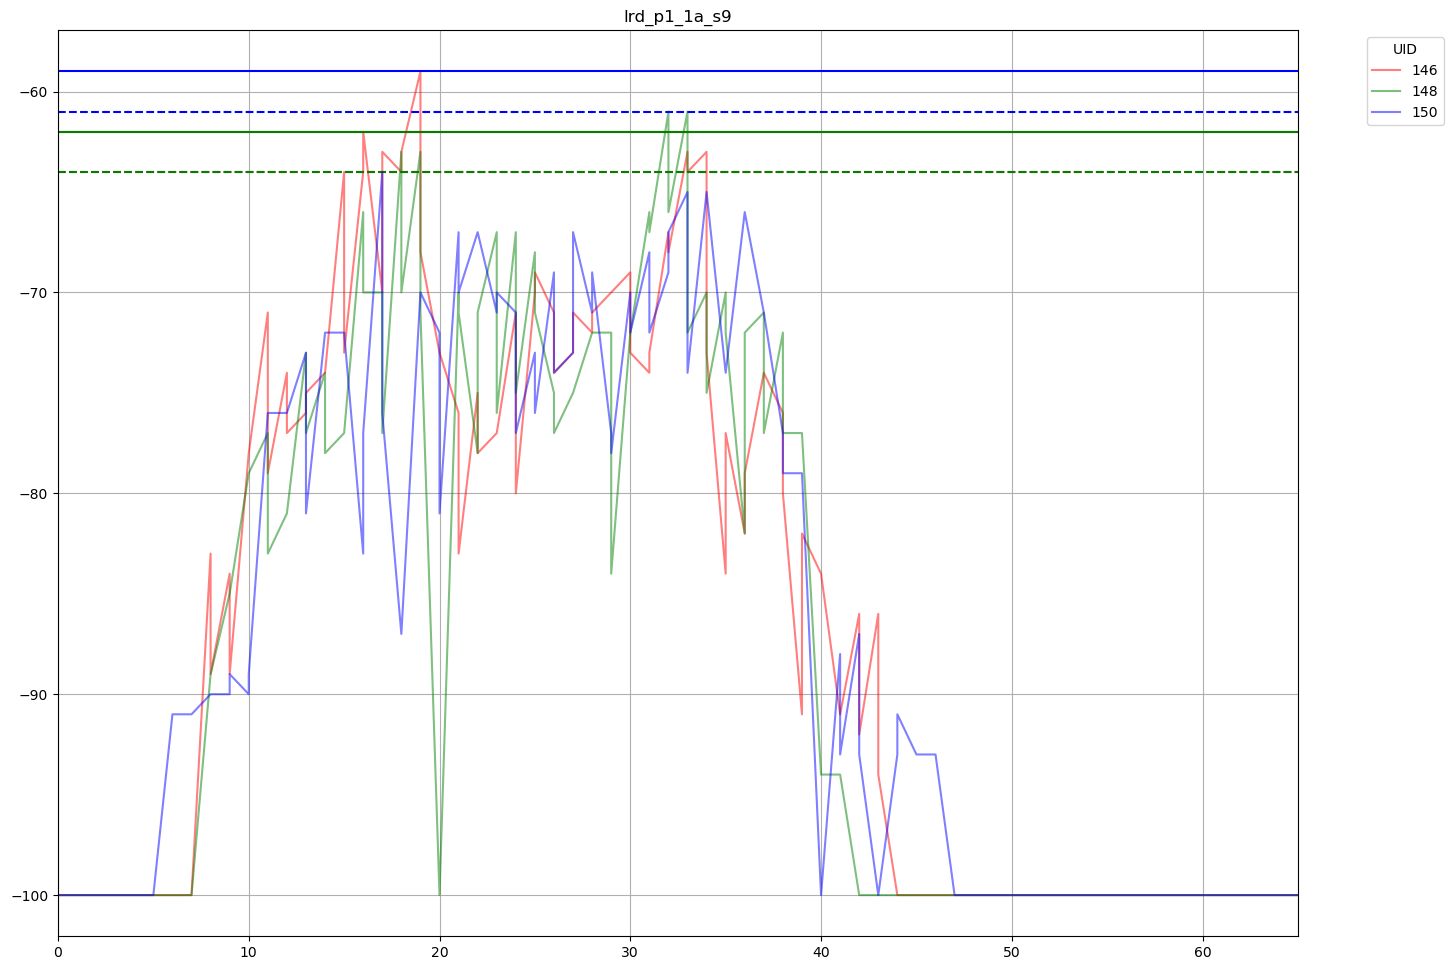

In [87]:
delta = 2
#set figure as larger size
figure(figsize=(16, 12), dpi=100)
plt.plot(df_merge1['time_delta'],df_merge1['RSSI'],'r',label='146',alpha=0.5)
#plt.scatter(df_merge1['time_delta'],df_merge1['RSSI'],color='r',label='146',alpha=0.5)
plt.axhline(y = -64, color = 'r', linestyle = '--')
plt.axhline(y = -64+delta, color = 'r', linestyle = '-')
plt.plot(df_merge2['time_delta'],df_merge2['RSSI'],'g',label='148',alpha=0.5)
#plt.scatter(df_merge2['time_delta'],df_merge2['RSSI'],color='g',label='148',alpha=0.5)
plt.axhline(y = -64, color = 'g', linestyle = '--')
plt.axhline(y = -64+delta, color = 'g', linestyle = '-')
plt.plot(df_merge3['time_delta'],df_merge3['RSSI'],'b',label='150',alpha=0.5)
#plt.scatter(df_merge3['time_delta'],df_merge3['RSSI'],color='b',label='150',alpha=0.5)
plt.axhline(y = -61, color = 'b', linestyle = '--')
plt.axhline(y = -61+delta, color = 'b', linestyle = '-')
plt.grid(True)
#plt.title('lrd_p1_1a_s9')
plt.xlim((0,60))
#set the legend out of the plot
plt.legend(title='UID', bbox_to_anchor=(1.05, 1), loc='upper left') 
#plt.savefig('s9_p1z1.png')

In [13]:
x = df_merge1.UID.unique()
x = x[~np.isnan(x)]
x

array([147., 146.])

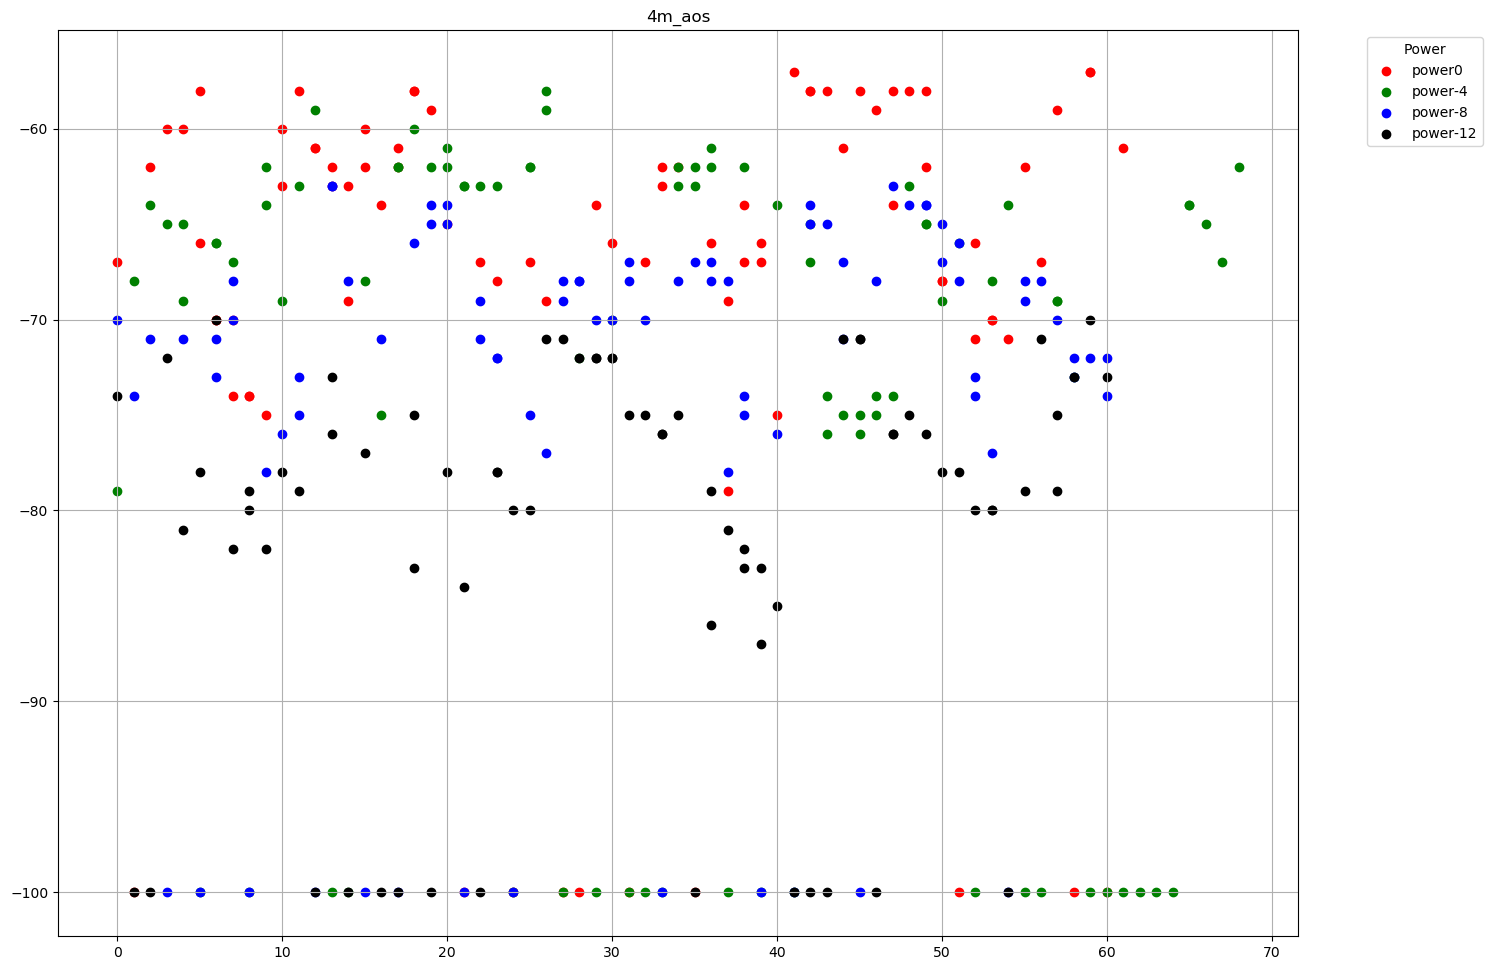

In [3]:
distance = '4m'
os_platform = 'aos'
df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_0_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df = df[~df.UUID.str.contains("Rule")]
df = df[~df.UUID.str.contains("=")]
df = df[['UID','RECEIVED TIME','RSSI']]
df['RECEIVED TIME'] = pd.to_datetime(df['RECEIVED TIME'])
#count the duration of data-taking
diff = (df['RECEIVED TIME'].iloc[-1]-df['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti = pd.date_range(df['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti = dti.to_frame(name='time')
dti['time_delta'] = ((dti['time']-dti['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

df2 = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_-4_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df2 = df2[~df2.UUID.str.contains("Rule")]
df2 = df2[~df2.UUID.str.contains("=")]
df2 = df2[['UID','RECEIVED TIME','RSSI']]
df2['RECEIVED TIME'] = pd.to_datetime(df2['RECEIVED TIME'])
#count the duration of data-taking
diff = (df2['RECEIVED TIME'].iloc[-1]-df2['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti2 = pd.date_range(df2['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti2 = dti2.to_frame(name='time')
dti2['time_delta'] = ((dti2['time']-dti2['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

df3 = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_-8_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df3 = df3[~df3.UUID.str.contains("Rule")]
df3 = df3[~df3.UUID.str.contains("=")]
df3 = df3[['UID','RECEIVED TIME','RSSI']]
df3['RECEIVED TIME'] = pd.to_datetime(df3['RECEIVED TIME'])
#count the duration of data-taking
diff = (df3['RECEIVED TIME'].iloc[-1]-df3['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti3 = pd.date_range(df3['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti3 = dti3.to_frame(name='time')
dti3['time_delta'] = ((dti3['time']-dti3['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

df4 = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_-12_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df4 = df4[~df4.UUID.str.contains("Rule")]
df4 = df4[~df4.UUID.str.contains("=")]
df4 = df4[['UID','RECEIVED TIME','RSSI']]
df4['RECEIVED TIME'] = pd.to_datetime(df4['RECEIVED TIME'])
#count the duration of data-taking
diff = (df4['RECEIVED TIME'].iloc[-1]-df4['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti4 = pd.date_range(df4['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti4 = dti4.to_frame(name='time')
dti4['time_delta'] = ((dti4['time']-dti4['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)


beacon1 = [146,147]
df_merge1 = dti.merge(df[df.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge1['RSSI'].fillna(-100, inplace=True)

df_merge2 = dti2.merge(df2[df2.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge2['RSSI'].fillna(-100, inplace=True)

df_merge3 = dti3.merge(df3[df3.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge3['RSSI'].fillna(-100, inplace=True)

df_merge4 = dti4.merge(df4[df4.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge4['RSSI'].fillna(-100, inplace=True)

#set figure as larger size
figure(figsize=(16, 12), dpi=100)
#plt.plot(df_merge1['time_delta'],df_merge1['RSSI'],'r',label='power0')
plt.scatter(df_merge1['time_delta'],df_merge1['RSSI'],color='r',label='power0')
#plt.axhline(y = -65, color = 'r', linestyle = '--')
#plt.plot(df_merge2['time_delta'],df_merge2['RSSI'],'g',label='power-4')
plt.scatter(df_merge2['time_delta'],df_merge2['RSSI'],color='g',label='power-4')
#plt.axhline(y = -65, color = 'r', linestyle = '--')
#plt.plot(df_merge3['time_delta'],df_merge3['RSSI'],'b',label='power-8')
plt.scatter(df_merge3['time_delta'],df_merge3['RSSI'],color='b',label='power-8')
#plt.plot(df_merge4['time_delta'],df_merge4['RSSI'],'k',label='power-12')
plt.scatter(df_merge4['time_delta'],df_merge4['RSSI'],color='k',label='power-12')


plt.grid(True)
plt.title('{}_{}'.format(distance,os_platform))
#set the legend out of the plot
plt.legend(title='Power', bbox_to_anchor=(1.05, 1), loc='upper left') 
#plt.savefig('s9_p1z1.png')